In [7]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d
from specim.specfuncs import spec1d
from astropy.io import fits as pf
from scipy import interpolate

In [8]:
file_loc = '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/*'

In [9]:
file_list = []
out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec2d' in p and '0053m1' in p:
        file_list.append(p)
        frame = p.split('_')[-3][:5]
        out_file.append('0053m1_r'+ frame + '_spec1d.fits')

In [10]:
file_list

['../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026a-0053m1_LRISr_2020Dec13T045626.045.fits',
 '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026b-0053m1_LRISr_2020Dec13T045626.045.fits',
 '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0028-0053m1_LRISr_2020Dec13T071213.306.fits',
 '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0027-0053m1_LRISr_2020Dec13T062831.930.fits']

In [11]:
spec = spec2d.Spec2d(file_list[1], hext=12, xtrim=[365, 400], transpose=True)
#spec.set_dispaxis('y')
spec.subtract_sky_2d()     #outfile=out_file[i])
spec.szap_new(infile='0053m1_lens_spectra/0053m1_lens_median_image_new.fits')  #, outfile='test.fits')


Loading file ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026b-0053m1_LRISr_2020Dec13T045626.045.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026b-0053m1_LRISr_2020Dec13T045626.045.fits (HDU=12)
The input dataset was trimmed
 xrange: 365:401.  yrange: 0:4096
The input dataset was transposed
Final data dimensions (x y): 4096 x 36

Dispersion axis:              x
N_pixels along dispersion axis: 4096


sky model will be generated from data

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From this point sky subtracted data will be used

From now cosmic ray rejected data will be used



<IPython.core.display.Javascript object>


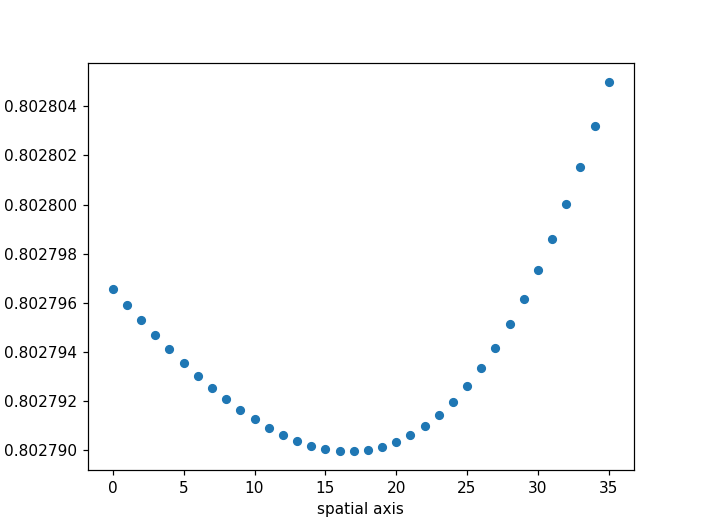

<IPython.core.display.Javascript object>


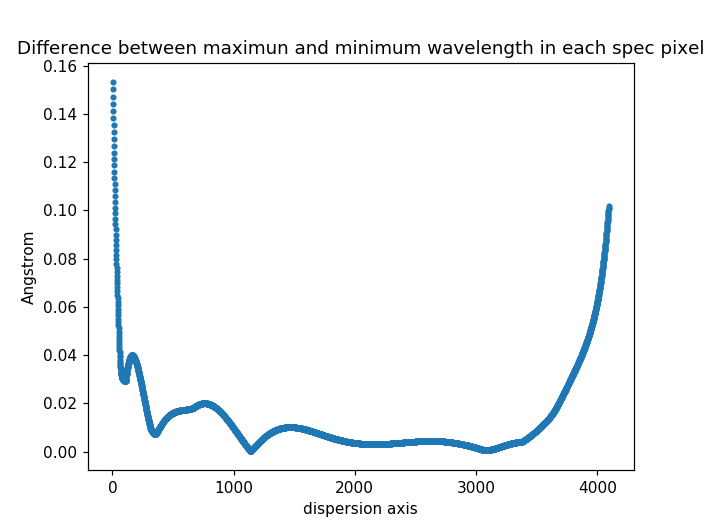

Dispersion : 0.800000
Found 46 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


In [12]:
%matplotlib notebook
spec.do_waverect(doplot=True, resamp_ord=1)

Profile max value (before normalization) 110.567398


<IPython.core.display.Javascript object>


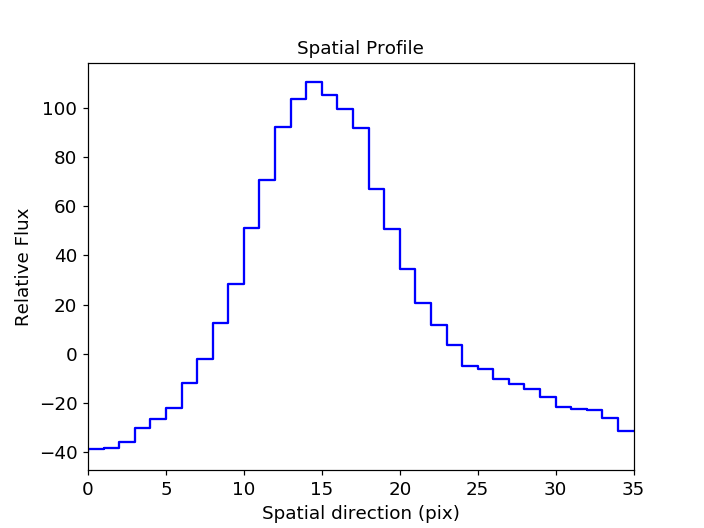

In [13]:
profile = spec.spatial_profile(pixrange=[1800, 2000])

In [ ]:
mod = spec.initial_model()

In [ ]:
spec.find_and_trace(mod, stepsize=25 , fitorder={'stddev_1' : 3})

In [ ]:
spec.extract(outfile=out_file[1], outformat='fits')

In [ ]:
ymod = interpolate.splrep(self.x, self.y)
yout = interpolate.splev(xout, ymod)

In [ ]:
file_loc1 = '0053m1_lens_spectra/*'

In [ ]:
file_list1 = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc1)):
    if 'spec1d' in p and  '0053m1' in p:
        #if '.fits' in p:
        file_list1.append(p)
file_list1

In [ ]:
spec = spec1d.Spec1d(file_list1[2], informat='fits') 

In [ ]:
for i, p in enumerate(file_list1):
    if i!=2 :
        spec1 = spec1d.Spec1d(p, informat='fits')
        spec1.resample(owave=spec['wav'])
        #spec1.smooth(3)
        #print(spec1.rswav)
        #print(spec1['flux'][30:50])
        #print(spec1.rsflux[30:50])
        #plt.figure()
        #plt.plot(spec1.rswav[:-10], spec1.rsflux[:-10])
        var_mod = interpolate.splrep(spec1['wav'], spec1['var'])
        var_out = interpolate.splev(spec['wav'], var_mod)
        #print(spec1['var'])
        #print(var_out)
        spec_resmp = spec1d.Spec1d(wav=spec1.rswav, flux=spec1.rsflux, var=var_out)
        #spec_resmp.smooth(3)
        spec= spec.__add__(spec_resmp)

In [ ]:
spec.smooth(3)
spec.mark_lines('abs', z=3.8, usesmooth=True)
#spec.mark_lines('strongem', z=3.8, usesmooth=True)
spec.mark_lines('em', z=3.8, usesmooth=True)

In [ ]:
spec.smooth(3)

In [ ]:
sp = pf.open(file_list[0])

In [ ]:
sp[19].header